### Dados

In [25]:
train_path = 'avi_lic_train.txt'
f = open(train_path, mode='r', encoding='utf-8').read().splitlines()
f[:20]

['PREGÃO X X B-MODALIDADE_LICITACAO',
 'Nº X X O',
 '519 X X B-NUM_LICITACAO',
 '2005 X X I-NUM_LICITACAO',
 'Objeto X X O',
 'AQUISIÇÃO X X B-OBJ_LICITACAO',
 'DE X X I-OBJ_LICITACAO',
 'APARELHOS X X I-OBJ_LICITACAO',
 'equipamentos X X I-OBJ_LICITACAO',
 'utensílios X X I-OBJ_LICITACAO',
 'médico X X I-OBJ_LICITACAO',
 'odontologico X X I-OBJ_LICITACAO',
 'laboratorial X X I-OBJ_LICITACAO',
 'ratorial X X I-OBJ_LICITACAO',
 'e X X I-OBJ_LICITACAO',
 'hospitalar X X I-OBJ_LICITACAO',
 'Sistema X X I-OBJ_LICITACAO',
 'de X X I-OBJ_LICITACAO',
 'ultra X X I-OBJ_LICITACAO',
 'som X X I-OBJ_LICITACAO']

## Pré-processamento dos dados

### Passo 1: Separando as palavras e as classes

In [26]:
def preprocess(ner_set):
    sentences = []
    tags = []

    temp_sentence = []
    temp_tag = []
    for line in ner_set:
        try:
            word, _, _, tag = line.split()
            temp_sentence.append(word)
            temp_tag.append(tag)
        except:
            sentences.append(temp_sentence)
            tags.append(temp_tag)
            temp_sentence = []
            temp_tag = []

    if temp_sentence:
        sentences.append(temp_sentence)
        tags.append(temp_tag)
    return sentences, tags

In [27]:
train_x, train_y = preprocess(open('avi_lic_train.txt', mode='r', encoding='utf-8'))
valid_x, valid_y = preprocess(open('avi_lic_testa.txt', mode='r', encoding='utf-8'))
test_x, test_y = preprocess(open('avi_lic_testb.txt', mode='r', encoding='utf-8'))

In [28]:
len(train_x), len(train_y), len(valid_x), len(valid_y), len(test_x), len(test_y)

(164, 164, 70, 70, 70, 70)

In [29]:
print(' '.join(train_x[0]))
print()
print(' '.join(train_y[0]))

PREGÃO Nº 519 2005 Objeto AQUISIÇÃO DE APARELHOS equipamentos utensílios médico odontologico laboratorial ratorial e hospitalar Sistema de ultra som com dopller conforme quantidade e especificações constante no anexo I do Edital Processo 060 002 756 2005 Abertura 06 de setembro 2005 às 8h30 O respectivo edital poderá ser retirado pelo endereço eletrônico www fazenda df gov br ou na Seção de Protocolo desta Subsecretaria de Compras e Licitações do Distrito Federal no Setor Bancário Sul Quadra 02 Bloco L Térreo Edifício Lino Martins Pinto das 08 às 12h e das 14às 18h mediante a apresentação do comprovante de recolhimento pago em qualquer agência bancária através de DAR código 357 3 no valor de R 7 00 sete reais As empresas e ou representantes que adquirirem o edital via Internet obrigam se a acompanhar o Diário Oficial do Distrito Federal à possíveis alterações Brasília DF 23 de agosto de 2005 FÁBIO PAIXÃO DE AZEVEDO Pregoeiro

B-MODALIDADE_LICITACAO O B-NUM_LICITACAO I-NUM_LICITACAO O B

### Passo 2: Criando os dicionários de palavras e classes (utilizando o conjunto de treinamento)

Incluindo os tokens especiais \<UNK\>, \<BOS\>, \<EOS\> de palavras e \<PAD\> para classes

In [30]:
from collections import OrderedDict

def word_dict(sentences):
    word2idx = OrderedDict({'<UNK>': 0, '<PAD>': 1, '<BOS>': 2, '<EOS>': 3})
    for sentence in sentences:
        for word in sentence:
            if word not in word2idx:
                word2idx[word] = len(word2idx)
    return word2idx

def tag_dict(tag_sentences):
    tag2idx = OrderedDict({'<PAD>': 0})
    for tags in tag_sentences:
        for tag in tags:
            if tag not in tag2idx:
                tag2idx[tag] = len(tag2idx)
    return tag2idx

word2idx = word_dict(train_x)
tag2idx  = tag_dict(train_y)

In [31]:
tag2idx

OrderedDict([('<PAD>', 0),
             ('B-MODALIDADE_LICITACAO', 1),
             ('O', 2),
             ('B-NUM_LICITACAO', 3),
             ('I-NUM_LICITACAO', 4),
             ('B-OBJ_LICITACAO', 5),
             ('I-OBJ_LICITACAO', 6),
             ('B-PROCESSO', 7),
             ('I-PROCESSO', 8),
             ('B-DATA_ABERTURA', 9),
             ('I-DATA_ABERTURA', 10),
             ('B-SISTEMA_COMPRAS', 11),
             ('I-SISTEMA_COMPRAS', 12),
             ('B-CODIGO_SISTEMA_COMPRAS', 13),
             ('I-CODIGO_SISTEMA_COMPRAS', 14),
             ('B-VALOR_ESTIMADO', 15),
             ('I-VALOR_ESTIMADO', 16),
             ('I-MODALIDADE_LICITACAO', 17),
             ('B-ORGAO_LICITANTE', 18),
             ('I-ORGAO_LICITANTE', 19),
             ('B-TIPO_OBJ', 20),
             ('I-TIPO_OBJ', 21)])

In [32]:
for idx, word in enumerate(word2idx):
    print(word, word2idx[word])
    if idx >= 20:
        break

<UNK> 0
<PAD> 1
<BOS> 2
<EOS> 3
PREGÃO 4
Nº 5
519 6
2005 7
Objeto 8
AQUISIÇÃO 9
DE 10
APARELHOS 11
equipamentos 12
utensílios 13
médico 14
odontologico 15
laboratorial 16
ratorial 17
e 18
hospitalar 19
Sistema 20


### Passo 3: Substituir as palavras e classes pelos seus indices nos dicionarios criados

In [33]:
def numericalize(sentences, word2idx, tag_sentences, tag2idx):
    numericalized_sentences = [[word2idx['<UNK>'] if word not in word2idx else word2idx[word] for word in sentence] for sentence in sentences]
    numericalized_tags = [[tag2idx[tag] for tag in tags] for tags in tag_sentences]
    return numericalized_sentences, numericalized_tags

train_x, train_y = numericalize(train_x, word2idx, train_y, tag2idx)
valid_x, valid_y = numericalize(valid_x, word2idx, valid_y, tag2idx)
test_x, test_y = numericalize(test_x, word2idx, test_y, tag2idx)

train_x[0]

[4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 18,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 7,
 39,
 40,
 21,
 41,
 7,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 21,
 61,
 62,
 63,
 21,
 64,
 18,
 65,
 33,
 66,
 67,
 30,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 42,
 82,
 18,
 80,
 83,
 84,
 85,
 86,
 87,
 33,
 88,
 21,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 21,
 96,
 97,
 98,
 99,
 30,
 100,
 21,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 18,
 58,
 108,
 109,
 110,
 111,
 46,
 112,
 113,
 114,
 115,
 86,
 116,
 111,
 117,
 118,
 33,
 66,
 67,
 119,
 120,
 121,
 122,
 123,
 124,
 21,
 125,
 21,
 7,
 126,
 127,
 10,
 128,
 129]

### Passo 4: Adicionar tokens de inicio e final de sentenca

In [34]:
import itertools
import torch
def add_special_tokens(sentences, word2idx, tag_sentences, tag2idx):
    formatted_sentences = [torch.LongTensor([word for word in itertools.chain([word2idx['<BOS>']], sentence, [word2idx['<EOS>']])]) for sentence in sentences]
    formatted_tags = [torch.LongTensor([tag for tag in itertools.chain([tag2idx['O']], tags, [tag2idx['O']])]) for tags in tag_sentences]
    return formatted_sentences, formatted_tags

train_x, train_y = add_special_tokens(train_x, word2idx, train_y, tag2idx)
valid_x, valid_y = add_special_tokens(valid_x, word2idx, valid_y, tag2idx)
test_x, test_y   = add_special_tokens(test_x, word2idx, test_y, tag2idx)

train_x[0]

tensor([  2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  18,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,   7,  39,  40,  21,  41,
          7,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
         55,  56,  57,  58,  59,  60,  21,  61,  62,  63,  21,  64,  18,  65,
         33,  66,  67,  30,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  42,  82,  18,  80,  83,  84,  85,  86,  87,  33,
         88,  21,  89,  90,  91,  92,  93,  94,  95,  21,  96,  97,  98,  99,
         30, 100,  21, 101, 102, 103, 104, 105, 106, 107,  18,  58, 108, 109,
        110, 111,  46, 112, 113, 114, 115,  86, 116, 111, 117, 118,  33,  66,
         67, 119, 120, 121, 122, 123, 124,  21, 125,  21,   7, 126, 127,  10,
        128, 129,   3])

### Passo 5: Criar os mini-batches de treinamento

In [35]:
len(train_x), max([len(ato) for ato in train_x])

(164, 347)

In [36]:
import numpy as np

# Ordenando sentencas por tamanho (antes de criar os batches)
ordered_idx = np.argsort([len(train_x[i]) for i in range(len(train_x))])
train_x = [train_x[idx] for idx in ordered_idx]
train_y = [train_y[idx] for idx in ordered_idx]

In [37]:
from torch.nn.utils.rnn import pad_sequence

def create_batches(x, y, batch_size, pad_token, pad_class):
    batch_x = []
    batch_y = []
    mask = []

    # Separando os batches pelo tamanho de batch_size
    i = 0
    while i < len(x):
        batch_x.append(x[i:min(len(x), i+batch_size)])
        batch_y.append(y[i:min(len(y), i+batch_size)])
        i += batch_size
    
    # Realizando padding dos batches e criando mask para identificar padding durante o treinamento
    for i in range(len(batch_x)):
        batch_x[i] = pad_sequence(batch_x[i], batch_first = True, padding_value = pad_token)
        batch_y[i] = pad_sequence(batch_y[i], batch_first = True, padding_value = pad_class)
        mask.append(batch_x[i] != pad_token)

    return batch_x, batch_y, mask

train_x, train_y, mask = create_batches(train_x, train_y, batch_size=32, pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])
valid_x, _, valid_mask = create_batches(valid_x, valid_y, batch_size=len(valid_x), pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])
test_x, _, test_mask   = create_batches(test_x,  test_y,  batch_size=len(test_x),  pad_token=word2idx['<PAD>'], pad_class=tag2idx['<PAD>'])

In [38]:
train_x[0].shape, train_y[0].shape, mask[0].shape

(torch.Size([32, 105]), torch.Size([32, 105]), torch.Size([32, 105]))

In [39]:
train_x[0][0, :mask[0][0].sum()]

tensor([   2,  389,  456, 1035,  252,  459,  491,   33,  437,  461,  462,  865,
         864, 1036,  150,  255,   21, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
        1044, 1045, 1046, 1047, 1048, 1049,  923, 1050,  199, 1051, 1052, 1053,
        1054,   18,  804,  274,   18,  275,  199,  239,  312,  333,  252,   42,
         721,  772,    3])

## Criando o modelo neural biLSTM-CRF

O modelo consiste em:



1.   Camada de embeddings (transforma indices das palavras em vetores numericos)
2.   Camada biLSTM para encode da informação (-> <-)
3.   Camada linear para reducao da dimensao do vetor de saida da camada biLSTM
3.   Camada CRF para classificação de cada token de entrada

In [40]:
from torchcrf import CRF

In [41]:
class bilstm_crf(torch.nn.Module):
    def __init__(self, word2idx, tag2idx):
        super(bilstm_crf, self).__init__()
        # Camada de embeddings
        self.embedding = torch.nn.Embedding(num_embeddings=len(word2idx), embedding_dim = 50, padding_idx = word2idx['<PAD>'])
        # Camada biLSTM
        self.bilstm = torch.nn.LSTM(input_size=50, hidden_size = 200, num_layers = 2, batch_first = True, bidirectional = True, dropout = 0.25)
        # Camada linear
        self.linear = torch.nn.Linear(400, len(tag2idx))
        # Camada CRF
        self.crf = CRF(num_tags = len(tag2idx), batch_first = True)

    def forward(self, x, y, mask):
        x = self.embedding(x)
        x, _ = self.bilstm(x)
        x = self.linear(x)
        loss = self.crf(x, y, mask=mask)
        return loss

    def decode(self, x, mask):
        x = self.embedding(x)
        x, _ = self.bilstm(x)
        x = self.linear(x)
        prediction = self.crf.decode(x, mask=mask)
        return prediction

In [42]:
model = bilstm_crf(word2idx = word2idx, tag2idx = tag2idx)
loss = model(train_x[0], train_y[0], mask[0])
prediction = model.decode(valid_x[0], valid_mask[0])

loss

tensor(-9002.9863, grad_fn=<SumBackward0>)

In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

cpu


## Código para avaliação do modelo

Métrica span-based f1-score (f1-score a nível de entidades)

$f_1 = 2\frac{precision\times recall}{precision + recall}$

$precision = \frac{TP}{TP + FP}$

$recall = \frac{TP}{TP + FN}$

In [44]:
from seqeval.metrics import f1_score
from seqeval.scheme import IOB1

In [45]:
idx2tag = {idx: tag for tag, idx in tag2idx.items()}

def IOBify(tags_sequence, idx2tag):
    if isinstance(tags_sequence[0], list):
        iob_y = [[idx2tag[tag] for tag in tags] for tags in tags_sequence]
    else:
        iob_y = [[idx2tag[tag.item()] for tag in tags] for tags in tags_sequence]
    return iob_y

y_true = IOBify(valid_y, idx2tag)
y_pred = IOBify(prediction, idx2tag)

In [46]:
f1_score(y_true, y_pred)

0.0021777003484320556

## Código para treinamento do modelo

In [47]:
lrate = 0.015
optim = torch.optim.SGD(model.parameters(), lr=lrate, momentum=0.9)

In [48]:
f1_history = []
mean_loss_history = []

# Alterar numero de epocas de treinamento (~30-50 epocas para modelo bem treinado)
for epoch in range(50):
    mean_loss = 0.0
    model.train()
    # Iniciando uma epoch de treinamento supervisionado
    for batch in range(len(train_x)):
        x = train_x[batch].to(device)
        y = train_y[batch].to(device)
        m = mask[batch].to(device)
        optim.zero_grad()
        loss = -model(x, y, m)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)
        optim.step()
        mean_loss += loss
    mean_loss /= len(train_x)
    mean_loss_history.append(mean_loss)

    model.eval()
    # Calculo do desempenho do modelo treinado nesta epoch
    y_pred = model.decode(valid_x[0].to(device), valid_mask[0].to(device))
    y_pred = IOBify(y_pred, idx2tag)
    y_true = IOBify(valid_y, idx2tag)
    f1 = f1_score(y_true, y_pred)
    f1_history.append(f1)

    print(f'Epoch: {epoch} | Loss media: {mean_loss} | f1-score: {f1}')

Epoch: 0 | Loss media: 10525.5546875 | f1-score: 0.0
Epoch: 1 | Loss media: 4984.36181640625 | f1-score: 0.0
Epoch: 2 | Loss media: 4031.839599609375 | f1-score: 0.0
Epoch: 3 | Loss media: 3434.268310546875 | f1-score: 0.0
Epoch: 4 | Loss media: 3233.984375 | f1-score: 0.0
Epoch: 5 | Loss media: 2777.2060546875 | f1-score: 0.0
Epoch: 6 | Loss media: 2623.4521484375 | f1-score: 0.0
Epoch: 7 | Loss media: 2441.472412109375 | f1-score: 0.0
Epoch: 8 | Loss media: 2214.09423828125 | f1-score: 0.0
Epoch: 9 | Loss media: 2061.86669921875 | f1-score: 0.01532567049808429
Epoch: 10 | Loss media: 1882.01611328125 | f1-score: 0.0
Epoch: 11 | Loss media: 1741.376953125 | f1-score: 0.012048192771084338
Epoch: 12 | Loss media: 1631.0379638671875 | f1-score: 0.062256809338521395
Epoch: 13 | Loss media: 1579.0018310546875 | f1-score: 0.06772908366533865
Epoch: 14 | Loss media: 1486.8380126953125 | f1-score: 0.07157057654075547
Epoch: 15 | Loss media: 1446.5245361328125 | f1-score: 0.10058027079303675
E

In [49]:
mean_loss_history_ = [mean_loss.item() for mean_loss in mean_loss_history]

[Text(0.5, 0, 'epochs'), Text(0, 0.5, 'mean loss')]

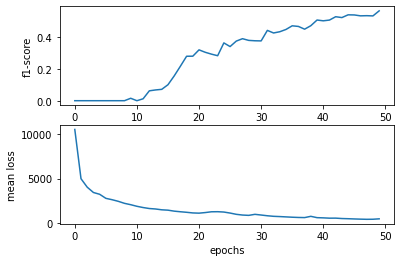

In [50]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(f1_history)
axs[1].plot(mean_loss_history_)
axs[0].set(ylabel='f1-score')
axs[1].set(xlabel='epochs', ylabel='mean loss')

## Utilização do modelo treinado para predição em novos dados e interface com usuário

Passos:


1.   Transformar as palavras do texto em indices utilizando o dicionario word2idx e converter para tensor
2.   Realizar as predições
3.   Realizar extração das entidades de acordo com as predições

### Passo 1: Transformar as palavras em indices utilizando word2idx

In [52]:
text = '<BOS> AVISO DE LICITAÇÃO PREGÃO ELETRÔNICO Nº 46/2022 - UASG 974002 O Pregoeiro comunica aos interessados que a fim de atender a demanda dos Órgãos que compõem a estrutura administrativa do Distrito Federal, a Subsecretaria de Compras Governamentais-SCG/SPLAN/SEEC-DF operacionalizará o Pregão Eletrônico acima referenciado, cujo objeto é Registro de Preços para a eventual aquisição de materiais de copa e cozinha (colher, filtro para café, jarra e outros), conforme especificações e quantidades constantes no Edital e seus Anexos. Valor estimado: R$ 1.827.205,95. Tipo de Licitação: menor preço. Abertura das propostas dia 27/04/2022, às 10h. Processo n.º 00040-00002212/2022-04. O edital poderá ser retirado no endereço eletrônico: www.comprasgovernamentais.gov.br. Informações pelo e-mail: pregoeirosulog01@economia.df.gov.br. Brasília/DF, 12 de abril de 2022 AUGUSTO CESAR PIRES ARANHA <EOS>'.split()
print(' '.join(text))

<BOS> AVISO DE LICITAÇÃO PREGÃO ELETRÔNICO Nº 46/2022 - UASG 974002 O Pregoeiro comunica aos interessados que a fim de atender a demanda dos Órgãos que compõem a estrutura administrativa do Distrito Federal, a Subsecretaria de Compras Governamentais-SCG/SPLAN/SEEC-DF operacionalizará o Pregão Eletrônico acima referenciado, cujo objeto é Registro de Preços para a eventual aquisição de materiais de copa e cozinha (colher, filtro para café, jarra e outros), conforme especificações e quantidades constantes no Edital e seus Anexos. Valor estimado: R$ 1.827.205,95. Tipo de Licitação: menor preço. Abertura das propostas dia 27/04/2022, às 10h. Processo n.º 00040-00002212/2022-04. O edital poderá ser retirado no endereço eletrônico: www.comprasgovernamentais.gov.br. Informações pelo e-mail: pregoeirosulog01@economia.df.gov.br. Brasília/DF, 12 de abril de 2022 AUGUSTO CESAR PIRES ARANHA <EOS>


In [53]:
num_text = torch.LongTensor([word2idx['<UNK>'] if word not in word2idx else word2idx[word] for word in text]).unsqueeze(dim=0)
mask = num_text != -1
num_text.shape, mask.shape

(torch.Size([1, 120]), torch.Size([1, 120]))

### Passo 2: Realizar predições

In [54]:
model = model.to('cpu')

In [55]:
y_pred = model.decode(num_text, mask)
y_pred = IOBify(y_pred, idx2tag)
for idx, (word, tag) in enumerate(zip(text, y_pred[0])):
    print(word, tag)
    if idx >= 20:
        break

<BOS> O
AVISO O
DE O
LICITAÇÃO O
PREGÃO B-MODALIDADE_LICITACAO
ELETRÔNICO I-MODALIDADE_LICITACAO
Nº O
46/2022 B-NUM_LICITACAO
- I-NUM_LICITACAO
UASG B-NUM_LICITACAO
974002 I-NUM_LICITACAO
O O
Pregoeiro O
comunica O
aos O
interessados O
que O
a O
fim O
de O
atender O


### Passo 3: Realizar extração das entidades de acordo com as predições

In [56]:
def extract_entities(y_pred, text):
    inside_entity = False
    entity_type = ''
    entity = ''
    entities = []
    for word, tag in zip(text, y_pred[0]):
        if not inside_entity:
            if tag[0] == 'B':
                inside_entity = True
                entity = word
                entity_type = tag[2:]
        else:
            if tag[0] == 'B':
                entities.append((entity_type, entity))
                entity = word
                entity_type = tag[2:]
                inside_entity = True
            elif tag[0] == 'I':
                entity = entity + ' ' + word
                inside_entity = True
            else:
                entities.append((entity_type, entity))
                entity = ''
                entity_type = 'O'
                inside_entity = False
    return entities

entities = extract_entities(y_pred, text)

In [57]:
entities

[('MODALIDADE_LICITACAO', 'PREGÃO ELETRÔNICO'),
 ('NUM_LICITACAO', '46/2022 -'),
 ('NUM_LICITACAO', 'UASG 974002'),
 ('OBJ_LICITACAO',
  'Registro de Preços para a eventual aquisição de materiais de copa e cozinha (colher, filtro para café, jarra e outros), conforme especificações e quantidades constantes no Edital e seus Anexos.')]

In [ ]:
# https://www.investopedia.com/ask/answers/032615/what-are-some-examples-stratified-random-sampling.asp#:~:text=Stratified%20random%20sampling%20is%20a,into%20groups%20is%20called%20stratification.


# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html